In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
!pip install git+https://github.com/ArjunDeshmukh/Useful_Utilities_For_ML

  Cloning https://github.com/ArjunDeshmukh/Useful_Utilities_For_ML to /tmp/pip-req-build-fsln5klv
  Running command git clone --filter=blob:none --quiet https://github.com/ArjunDeshmukh/Useful_Utilities_For_ML /tmp/pip-req-build-fsln5klv
  Resolved https://github.com/ArjunDeshmukh/Useful_Utilities_For_ML to commit 64fd97c65a302de0ec38122959b472ee3523e27b
  Preparing metadata (setup.py) ... - done
  Created wheel for useful-utilities-for-ml: filename=useful_utilities_for_ml-1.0.0-py3-none-any.whl size=6645 sha256=a07fd01f0ce4212f387c60696905a6c1cda42579b1dc14c9378fdc5ca487fbbf
  Stored in directory: /tmp/pip-ephem-wheel-cache-k4_jd77g/wheels/22/51/83/a4e532175093b4f6e1ef9e6424feeac5635c4f5d7b494050ba
Successfully built useful-utilities-for-ml


In [3]:
from useful_utilities_for_ml.addkernelregularization_tf import add_kernel_regularization 

## Generate synthetic straight line data

Text(0, 0.5, 'Y')

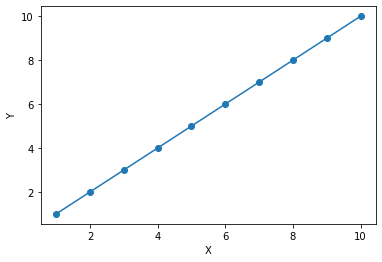

In [4]:
x = np.arange(1, 11)
y = x

plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")

## Fit a model with more than required parameters to synthetic data

In [5]:
model = tf.keras.Sequential([tf.keras.layers.Dense(100, activation = 'relu', input_shape = (1,)), tf.keras.layers.Dense(1, activation = None)])
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), loss = 'MSE')
model.fit(x, y, epochs=500, verbose = 0)

2023-02-15 18:59:07.192016: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-02-15 18:59:07.687543: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [6]:
x_test = np.array([0.5, 1.5, 2.5, 3.5, 4.5])
y_test = x_test
loss = model.evaluate(x_test, y_test, verbose = 0)
print('RMSE: ', np.sqrt(loss))

RMSE:  0.0014561572378525357


## Generate synthetic data with noise

In [7]:
x = np.arange(1, 11)
y_with_noise = x + 2*np.random.default_rng().uniform(low = -1, high = 1, size=(10, ))

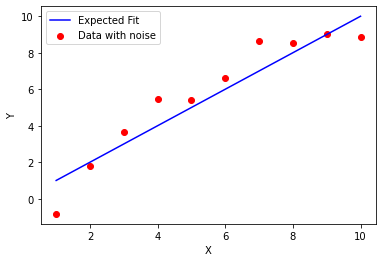

In [8]:
plt.plot(x, y, color = 'blue')
plt.scatter(x, y_with_noise, color = 'red')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(['Expected Fit', 'Data with noise'])

## Add L2 regularization to the pre-trained model, then tain and test it

In [9]:
model_wo_reg = tf.keras.Sequential([tf.keras.layers.Dense(100, activation = 'relu', input_shape = (1,)), tf.keras.layers.Dense(1, activation = None)])
model_wo_reg.set_weights(model.get_weights())
model_wo_reg = add_kernel_regularization(model = model_wo_reg, regularization_weight = 0.01, regularization_type = 'L2')
model_wo_reg.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), loss = 'MSE')
model_wo_reg.fit(x, y_with_noise, epochs=500, verbose = 0)

In [10]:
x_test = np.array([0.5, 1.5, 2.5, 3.5, 4.5])
y_test = x_test
loss = model_wo_reg.evaluate(x_test, y_test, verbose = 0)
print('RMSE: ', np.sqrt(loss))

RMSE:  0.22177946895116957


## Add L2-SP regularization to the pre-trained model, then tain and test it

In [11]:
model_reg = tf.keras.Sequential([tf.keras.layers.Dense(100, activation = 'relu', input_shape = (1,)), tf.keras.layers.Dense(1, activation = None)])
model_reg.set_weights(model.get_weights())
model_reg = add_kernel_regularization(model = model_reg, regularization_weight = 0.01, regularization_type = 'L2_SP')
model_reg.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), loss = 'MSE')
model_reg.fit(x, y_with_noise, epochs=500, verbose = 0)

In [12]:
x_test = np.array([0.5, 1.5, 2.5, 3.5, 4.5])
y_test = x_test
loss = model_reg.evaluate(x_test, y_test, verbose = 0)
print('RMSE: ', np.sqrt(loss))

RMSE:  0.09361942953942534
